# DATA SCIENCE FINAL REPORT

# ABSTRACT

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

- For this particular dataset, we are going to take FWI(Fire Weather Index) as the dependant feature and all other variables will be independant feature.

# VARIABLE INFORMATION

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fir and not fire.

# DATA CLEANING



In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the csv file.

url = 'https://raw.githubusercontent.com/chetanpw98/Chetan_Warad_002817179_Data-science-Assignment/main/Algerian_forest_fires_dataset.csv'
dataset = pd.read_csv(url,header=1)


In [ ]:
dataset.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**DATA CLEANING**

In [ ]:
## Checking for missing values

dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [ ]:
## Identify rows with missing values

dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Observation: We observe that the dataset is converted into 2 sets based on region from 122th row. We can make a new column based on the region i.e
Bejaia Region - 1
Sidi Bel-abbes region - 2

Therefore we add a new column named region.


In [ ]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df = dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [ ]:
df[['Region']]=df[['Region']].astype(int)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [ ]:
##Removing the null values

df=df.dropna().reset_index(drop=True)


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
##remove the 122nd row

df.drop(122).reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
##fixing the spaces in the column name

df.columns= df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Next step is to change required columns as integer data type.**

In [ ]:
df.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


In [ ]:
#Converting other columns to float except Classes

objects=[features for features in df.columns if df[features].dtypes =='O']

In [ ]:
for i in objects:
    if i != 'Classes':
        # Convert to numeric, replacing non-numeric values with NaN
        df[i] = pd.to_numeric(df[i], errors='coerce')
        # Fill NaN values with a default value (e.g., 0)
        df[i] = df[i].fillna(0).astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.696721,7.471311,2003.754098,32.020492,61.786885,15.430328,0.759836,77.523361,14.620492,49.228279,4.722951,16.622131,7.006557,0.500000
std,8.881839,1.211738,128.805101,4.164764,15.321375,2.975770,1.999677,15.162407,12.403172,47.672572,4.156779,14.239261,7.438889,0.501028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.750000,2012.000000,30.000000,52.000000,14.000000,0.000000,71.300000,5.775000,10.475000,1.400000,5.975000,0.700000,0.000000
50%,16.000000,7.500000,2012.000000,32.000000,63.000000,15.000000,0.000000,83.200000,11.250000,33.100000,3.400000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.225000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
##We intend to remove the columns for day, month, and year, as they do not hold significant relevance for our analysis.

df_copy=df.drop(['day','month','year'],axis=1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [ ]:
## Encoding of the categories in classes

df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
df_copy['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

**Data Visualization**

<ipython-input-37-df13d5b5f419>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

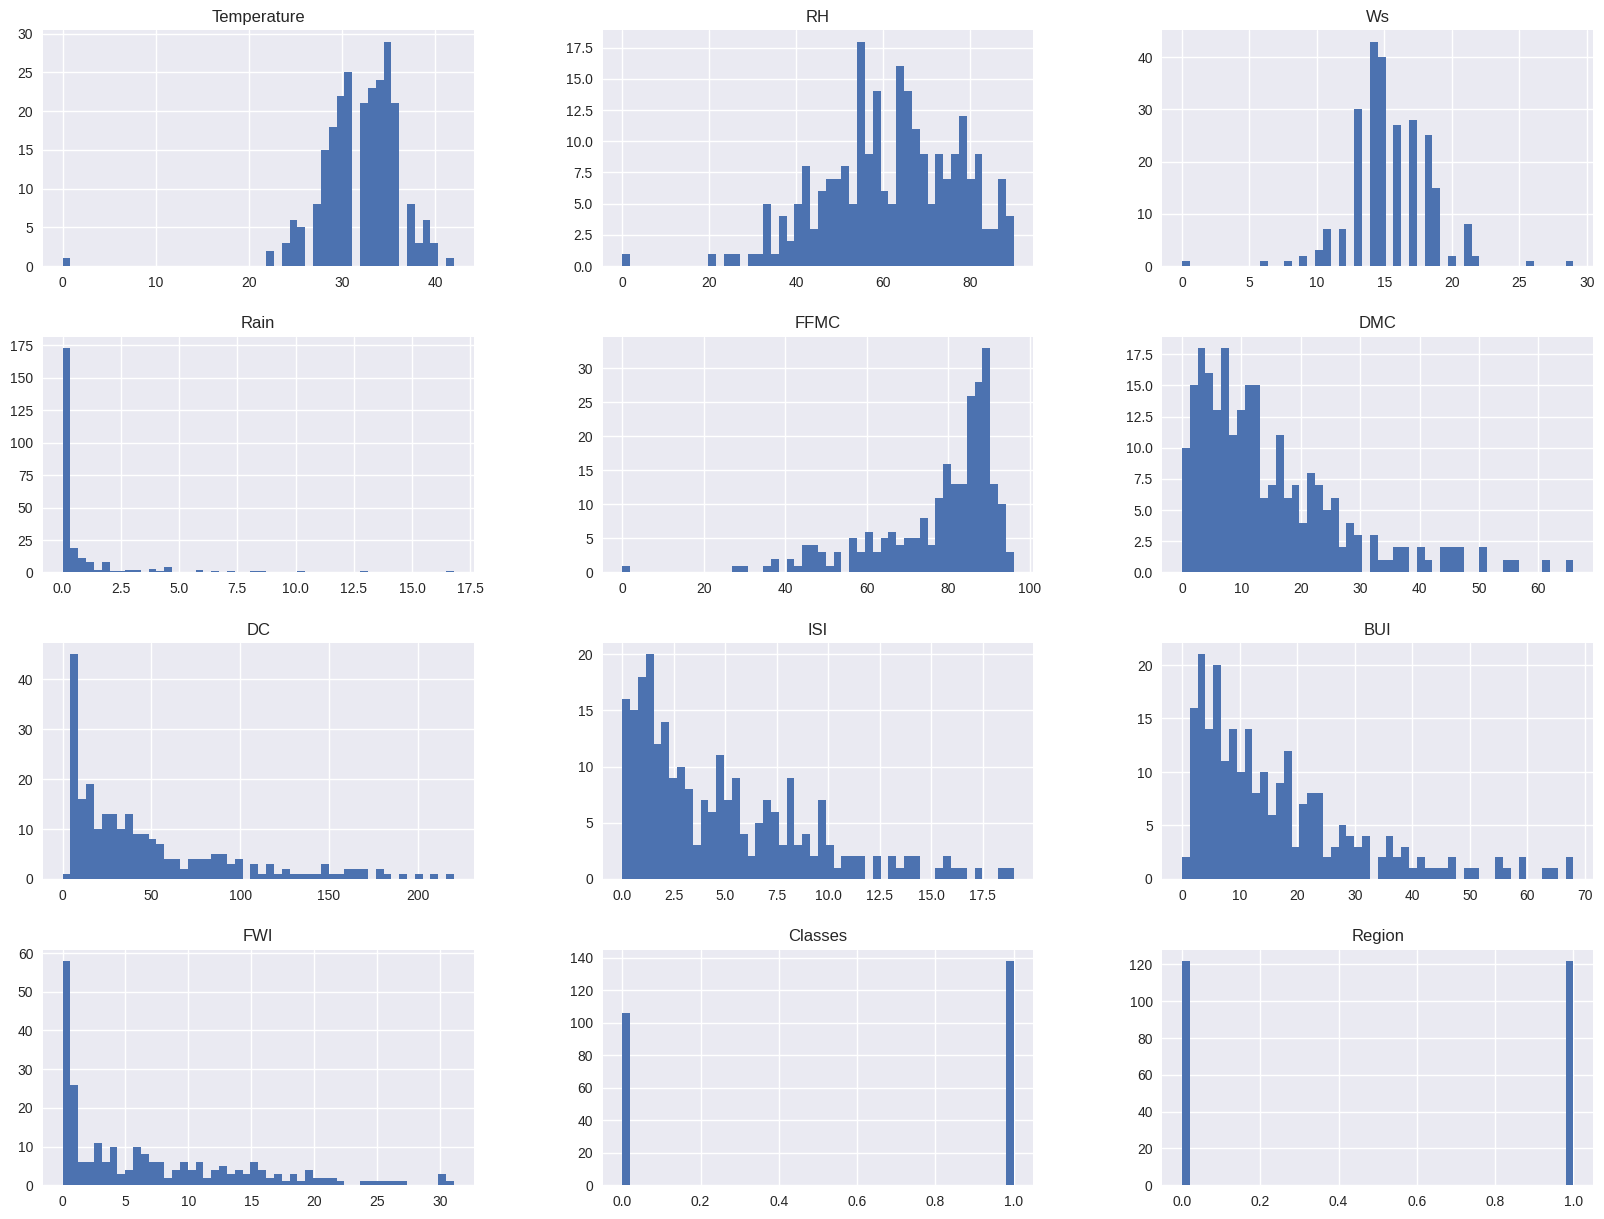

In [ ]:
##Plot density plaot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))


In [ ]:
##Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie chart of Classes')

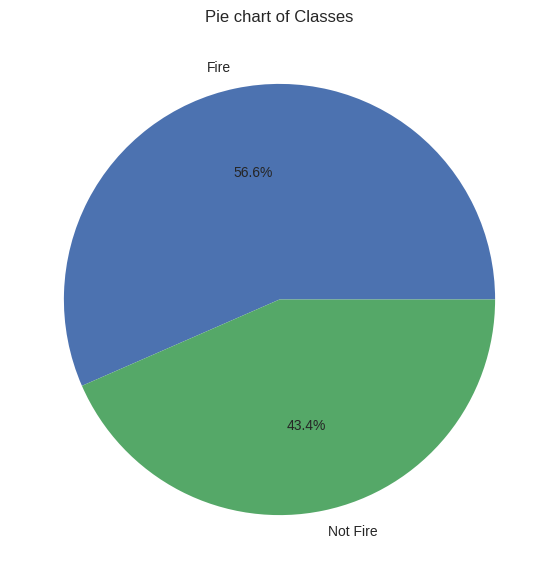

In [ ]:
##Plotting the Piechart

classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of Classes")

Observations:
56.6% of the area is prone to fire and 43.4% has no Fire area in Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

In [ ]:
##Correlation

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.418807,-0.068453,-0.271674,0.717924,0.458459,0.359201,0.559660,0.435670,0.521645,0.420093,0.202146
RH,-0.418807,1.000000,0.308634,0.221023,-0.503028,-0.373777,-0.201492,-0.642489,-0.321329,-0.544372,-0.431302,-0.404745
Ws,-0.068453,0.308634,1.000000,0.169792,-0.038749,0.024579,0.096570,0.032367,0.054569,0.050642,-0.084599,-0.191830
Rain,-0.271674,0.221023,0.169792,1.000000,-0.505509,-0.286006,-0.295656,-0.344668,-0.297084,-0.322251,-0.379758,-0.041485
FFMC,0.717924,-0.503028,-0.038749,-0.505509,1.000000,0.593340,0.499969,0.721035,0.582209,0.671439,0.707117,0.188378
DMC,0.458459,-0.373777,0.024579,-0.286006,0.593340,1.000000,0.876510,0.682220,0.982349,0.876332,0.578790,0.186281
DC,0.359201,-0.201492,0.096570,-0.295656,0.499969,0.876510,1.000000,0.511014,0.942242,0.740555,0.505457,-0.082657
ISI,0.559660,-0.642489,0.032367,-0.344668,0.721035,0.682220,0.511014,1.000000,0.646042,0.923164,0.727968,0.257268
BUI,0.435670,-0.321329,0.054569,-0.297084,0.582209,0.982349,0.942242,0.646042,1.000000,0.858528,0.579841,0.084159
FWI,0.521645,-0.544372,0.050642,-0.322251,0.671439,0.876332,0.740555,0.923164,0.858528,1.000000,0.713357,0.192451


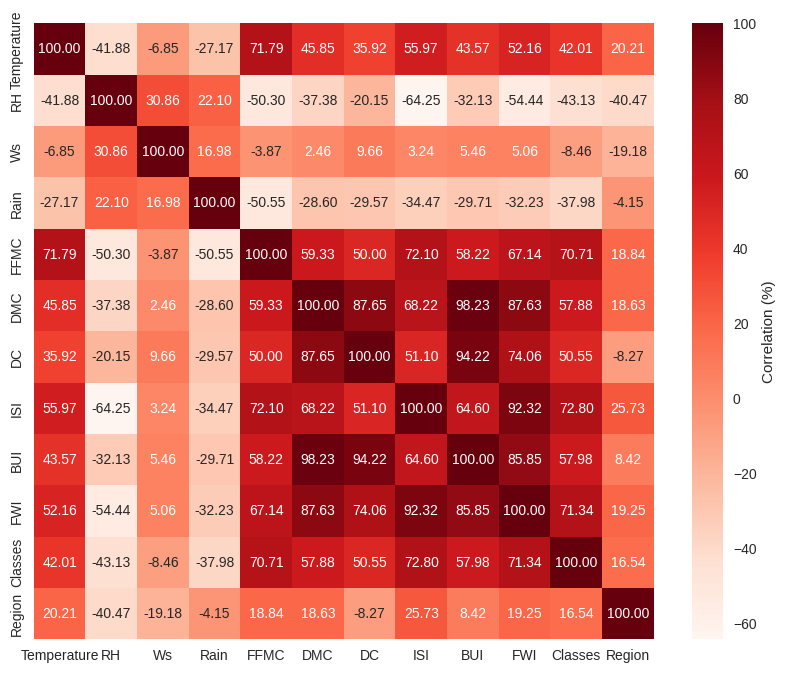

In [ ]:
#sns.heatmap(df_copy.corr())

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_copy.corr() * 100, annot=True, cmap='Reds', fmt='.2f', cbar=True)

# Display the percentage sign on the color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation (%)')

# Show the plot
plt.show()

<Axes: >

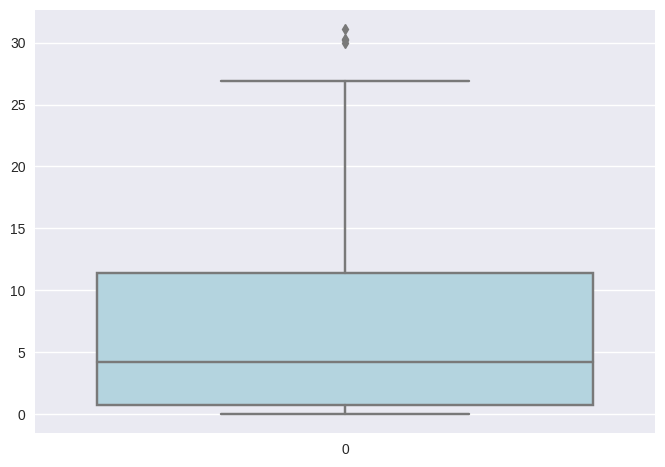

In [ ]:
##Box Plots

sns.boxplot(df['FWI'],color='lightblue')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region ')

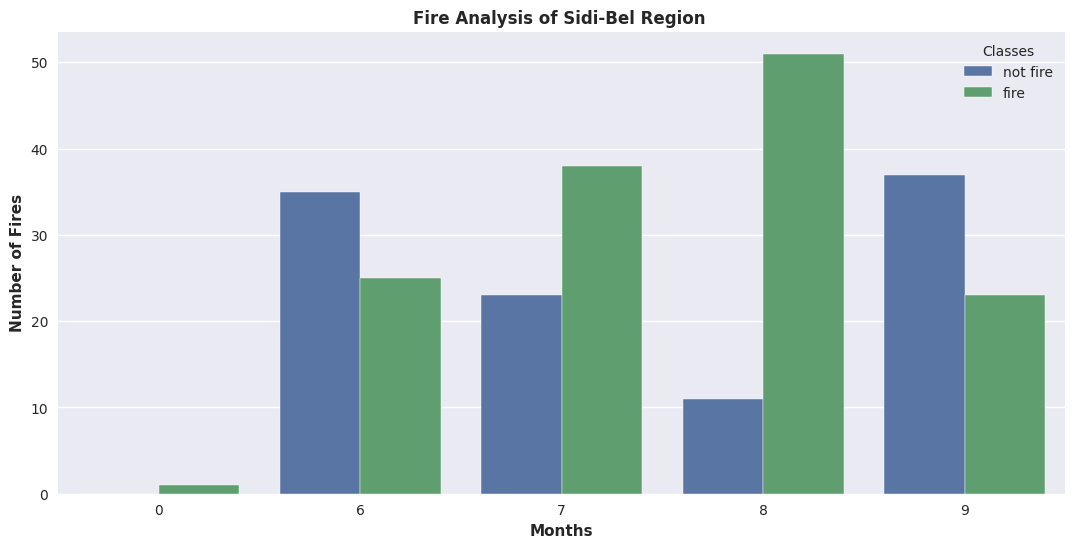

In [ ]:
##Monthly Fire Analysis

dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel Region ", weight='bold')



**Observations**
The maximum number of fires occured in UK

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region ')

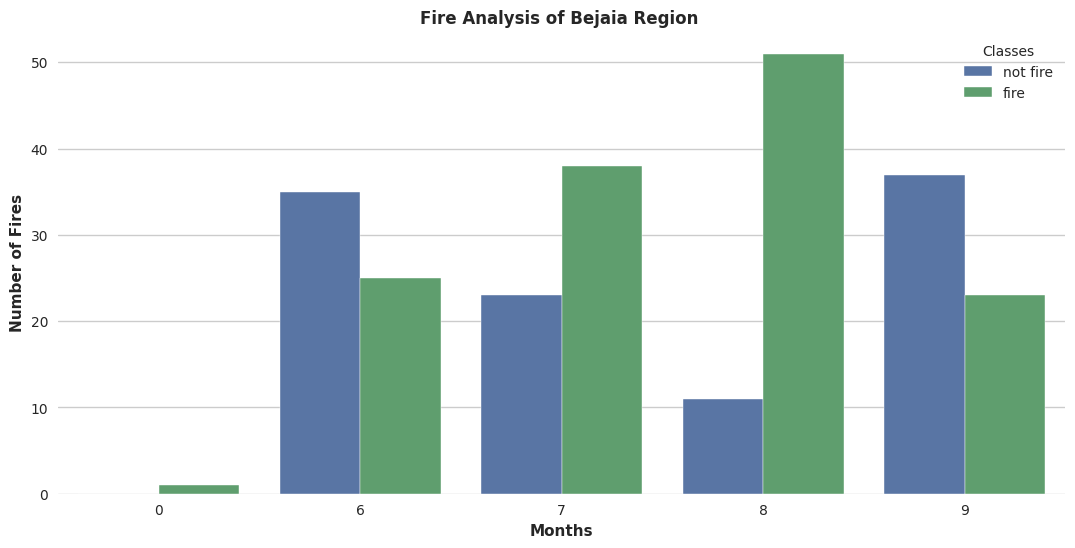

In [ ]:
##Monthly Fire Analysis of Bejaia Region

dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejaia Region ", weight='bold')

**Observations of the Fire occurance.**

-Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

-Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

-Less Fires was in September

# FEATURE SELECTION

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
## Dropping day , month and year.

df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

NOW, LET US DIVIDE OUR FEATURES INTO INDEPENDANT AND DEPENDANT FEATURES.

In [ ]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0


In [ ]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [ ]:
## Feature Selection based on correlaltion
X_train.corr()

<ipython-input-57-68f158d16dfc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,-0.367786,0.017876,-0.275211,0.748246,0.458347,0.363058,0.556063,0.437070,0.172104
RH,-0.367786,1.000000,0.321064,0.236698,-0.456987,-0.351882,-0.185739,-0.638511,-0.302647,-0.402065
Ws,0.017876,0.321064,1.000000,0.216235,0.007203,0.032697,0.105798,0.051952,0.065167,-0.245197
Rain,-0.275211,0.236698,0.216235,1.000000,-0.514665,-0.286380,-0.297158,-0.350688,-0.297860,-0.080694
FFMC,0.748246,-0.456987,0.007203,-0.514665,1.000000,0.585050,0.495050,0.721389,0.576000,0.203007
DMC,0.458347,-0.351882,0.032697,-0.286380,0.585050,1.000000,0.878205,0.656891,0.982083,0.196478
DC,0.363058,-0.185739,0.105798,-0.297158,0.495050,0.878205,1.000000,0.501831,0.941741,-0.077451
ISI,0.556063,-0.638511,0.051952,-0.350688,0.721389,0.656891,0.501831,1.000000,0.629020,0.271707
BUI,0.437070,-0.302647,0.065167,-0.297860,0.576000,0.982083,0.941741,0.629020,1.000000,0.092557
Region,0.172104,-0.402065,-0.245197,-0.080694,0.203007,0.196478,-0.077451,0.271707,0.092557,1.000000


<ipython-input-58-15725fc29068>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X_train.corr()


<Axes: >

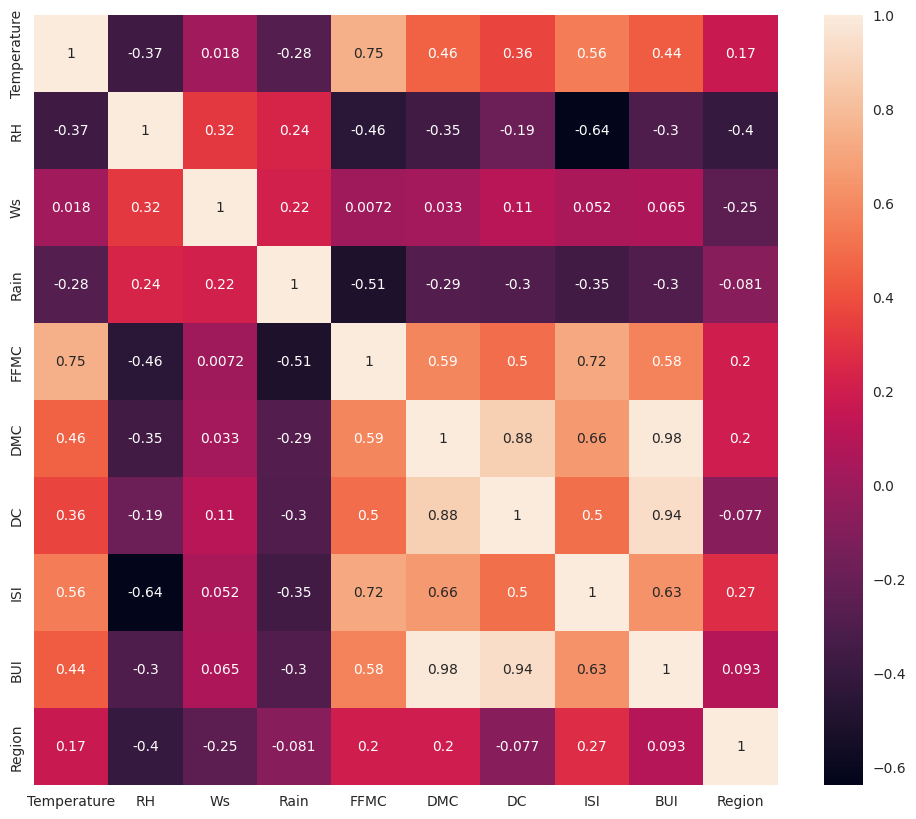

In [ ]:
##Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
## threshold--Domain expertise
corr_features =correlation(X_train,0.85)

<ipython-input-59-bccffb0672bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


Observation: We have kept a threshold of 0.85 due to which Drought Code (DC) index from the FWI system: 7 to 220.4 and Buildup Index (BUI) index from the FWI system can be dropped.

In [ ]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

Therefore, We now have 9 columns excluding BUI and DC.

##**Feature Scaling Or Standardization**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming X_train is your training data
# Replace this with the actual DataFrame you have
# X_train = ...

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)


In [ ]:

X_train_scaled

array([[-0.64393998,  0.17761838,  1.2063152 , ..., -1.00547949,
         0.        ,  1.        ],
       [ 0.95158636, -0.40980626,  0.1747466 , ...,  0.99455037,
         1.        ,  0.        ],
       [-0.18807531,  0.63450421, -0.51296581, ...,  0.99455037,
         1.        ,  0.        ],
       ...,
       [-1.55566932,  0.89558183,  0.5186028 , ..., -1.00547949,
         0.        ,  1.        ],
       [ 0.26778936, -0.34453686,  0.1747466 , ...,  0.99455037,
         1.        ,  0.        ],
       [-0.41600765,  0.96085123,  1.89402761, ..., -1.00547949,
         0.        ,  1.        ]])

## Box Plots To understand Effect Of Standard Scaler

<ipython-input-64-41fb1d7ced73>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

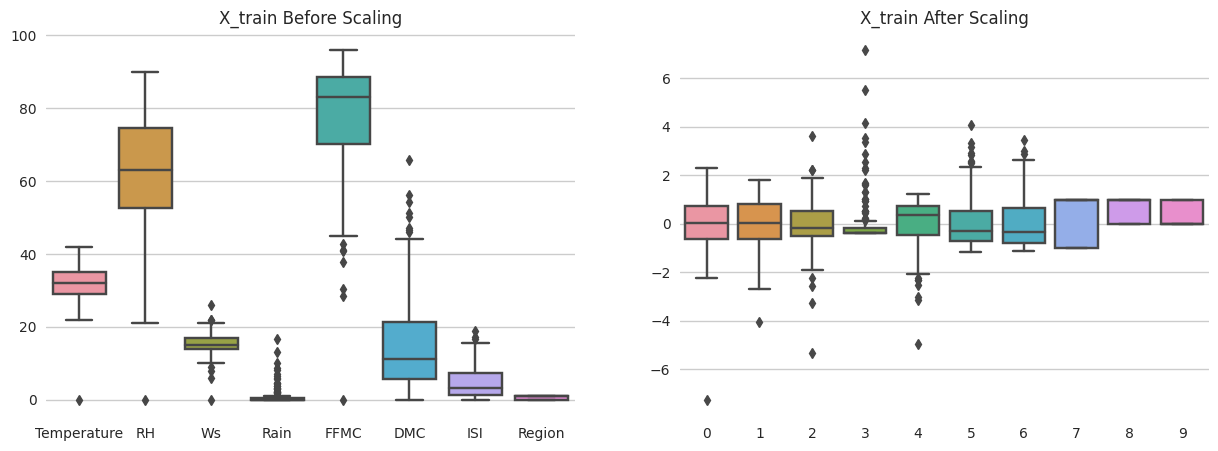

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# MODEL TRAINING

##LINEAR REGRESSION

Mean absolute error: 0.5645388929450864
R2 Score: 0.9902995076252105


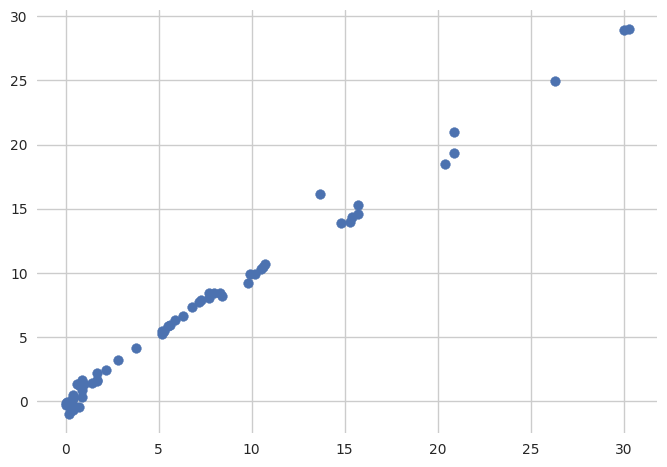

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'X_train_scaled' and 'X_test_scaled' are your feature matrices
# Replace this with your actual data loading process

# Handle missing values in the training set
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'constant' as well
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Handle missing values in the test set using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Now you can fit the model and make predictions
linreg = LinearRegression()
linreg.fit(X_train_scaled_imputed, y_train)
y_pred = linreg.predict(X_test_scaled_imputed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("R2 Score:", score)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.show()


OBSERVATIONS

Mean absolute error: 0.5945505067583878
R2 Score: 0.9903931646866284

Observation:
Mean Absolute Error (MAE): The model's predictions, on average, differ by approximately 0.5945 units from the actual values.

R-squared (R2) Score: The model explains approximately 99.04% of the variance in the target variable, indicating an excellent fit to the data.








##LASSO REGRESSION

Mean absolute error: 1.2096336058594148
R2 Score: 0.9518841449497847


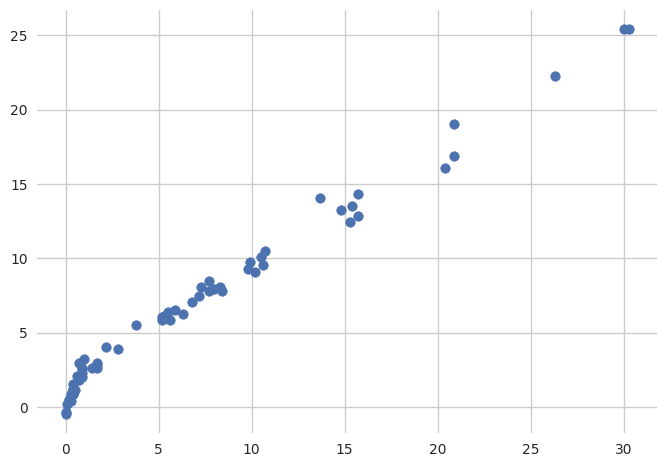

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'X_train_scaled' and 'X_test_scaled' are your feature matrices
# Replace this with your actual data loading process

# Handle missing values in the training set
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'constant' as well
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Handle missing values in the test set using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Now you can fit the Lasso model and make predictions
lasso = Lasso()
lasso.fit(X_train_scaled_imputed, y_train)
y_pred = lasso.predict(X_test_scaled_imputed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("R2 Score:", score)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.show()


We Observe that,
Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is approximately 1.21 units.

R-squared (R2) Score: The model explains approximately 95.19% of the variance in the target variable, indicating a strong fit to the data.

##Ridge Regression model

Mean absolute error: 0.5877867214087307
R2 Score: 0.9897689535737723


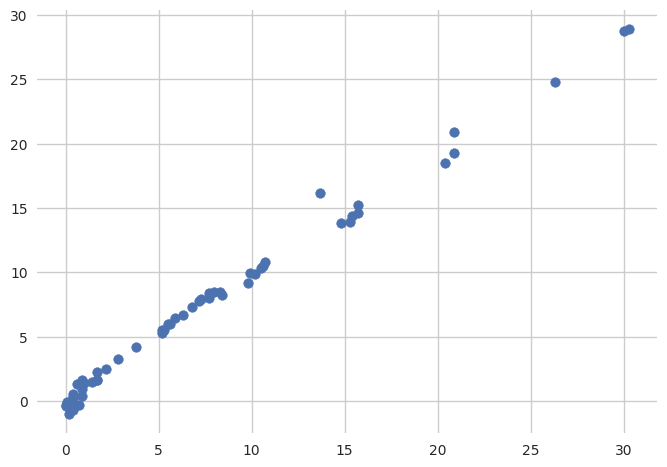

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'X_train_scaled' and 'X_test_scaled' are your feature matrices
# Replace this with your actual data loading process

# Handle missing values in the training set
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'constant' as well
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Handle missing values in the test set using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Now you can fit the Ridge model and make predictions
ridge = Ridge()
ridge.fit(X_train_scaled_imputed, y_train)
y_pred = ridge.predict(X_test_scaled_imputed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("R2 Score:", score)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.show()


Observation:

Mean Absolute Error (MAE):
The MAE is a measure of the average absolute difference between the predicted values and the actual values. In this case, a MAE of approximately 0.6072 indicates that, on average, the model's predictions differ by about 0.6072 units from the actual values.


R-squared (R2) Score:

The R-squared score is a measure of how well the model explains the variance in the target variable. A score of approximately 98.99% means that your model explains almost 99% of the variability in the target variable.

Mean Absolute Error: 0.7946229508196725
R2 Score: 0.9723745631909576


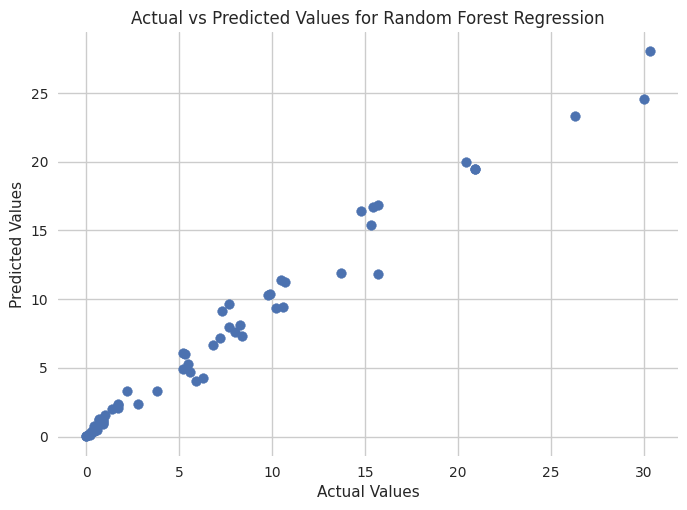

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'X_train_scaled', 'X_test_scaled', 'y_train', and 'y_test' are your data
# Replace this with your actual data loading process

# Handle missing values in the training set
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'constant' as well
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Handle missing values in the test set using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Instantiate the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model on the training data
rf_regressor.fit(X_train_scaled_imputed, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test_scaled_imputed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)

# Scatter plot for visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Random Forest Regression")
plt.show()


# AUTOML

In [ ]:
pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=9bbe42d3e25bd540933b8bb34149e53244d43f4fcc9fd27d822ce86adf5baa56
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV




In [ ]:

min_mem_size=6
run_time=222


In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)


3


In [ ]:

port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:36246..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxuvwjvfw
  JVM stdout: /tmp/tmpxuvwjvfw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxuvwjvfw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:36246
Connecting to H2O server at http://127.0.0.1:36246 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_pzlise
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Load cleaned dataset into H2O
df = h2o.import_file("https://raw.githubusercontent.com/chetanpw98/Chetan_Warad_002817179_Data-science-Assignment/main/Algerian_forest_fire_cleaned_dataset.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:

df.head()


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0
31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,1,0
33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [ ]:

df.describe()

Rows:244
Cols:12

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
type,int,int,int,real,real,real,real,real,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,32.02049180327874,61.786885245901665,15.430327868852455,0.7598360655737704,77.5233606557377,14.620491803278691,49.22827868852459,4.722950819672129,16.622131147540983,7.006557377049181,0.5655737704918032,0.5
maxs,42.0,90.0,29.0,16.8,96.0,65.9,220.4,19.0,68.0,31.1,1.0,1.0
sigma,4.164763783253846,15.321374568015894,2.9757701729993054,1.9996773334804507,15.162407059450372,12.403171893034584,47.672572148946365,4.1567791204257585,14.239260698286213,7.438889444360536,0.4967003040731738,0.501027750313655
zeros,1,1,1,134,1,1,1,5,1,10,106,122
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0


In [ ]:

df.types


{'Temperature': 'int',
 'RH': 'int',
 'Ws': 'int',
 'Rain': 'real',
 'FFMC': 'real',
 'DMC': 'real',
 'DC': 'real',
 'ISI': 'real',
 'BUI': 'real',
 'FWI': 'real',
 'Classes': 'int',
 'Region': 'int'}

In [ ]:
#Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:

print(df_train.shape)
print(df_test.shape)

(199, 12)
(45, 12)


In [ ]:

#Display all columns in X
X=df.columns
print(X)


['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


In [ ]:

#Seperate Dependent variable from Independent variable
y_numeric ='FWI'
X.remove(y_numeric)
print(X)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']


In [ ]:

dfpd=pd.read_csv("https://raw.githubusercontent.com/chetanpw98/Chetan_Warad_002817179_Data-science-Assignment/main/Algerian_forest_fire_cleaned_dataset.csv")

##H20 AutoML Execution

In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |██
02:55:42.773: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 196.0.

█████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


**OBSERVATIONS:**

MSE (Mean Squared Error): It is the
average of the squared differences between predicted and actual values. A lower MSE indicates better model performance.

RMSE (Root Mean Squared Error): It is the square root of the MSE. RMSE is in the same unit as the target variable and provides a more interpretable measure. Like MSE, lower RMSE values are better.

MAE (Mean Absolute Error): It is the average of the absolute differences between predicted and actual values. MAE is less sensitive to outliers compared to MSE.

RMSLE (Root Mean Squared Logarithmic Error): It is the root mean squared difference between the natural logarithm of the predicted values and the natural logarithm of the actual values. RMSLE is commonly used when the target variable is skewed.

Mean Residual Deviance: It measures the average squared difference between the predicted and actual values. It is often used as a goodness-of-fit measure in the context of GLM (Generalized Linear Models).


**VARIABLE IMPORTANCE:**

ISI (Initial Spread Index): Most critical, contributing over 51% to the model.

FFMC (Fine Fuel Moisture Code): Second important, contributing around 32%.

BUI (Buildup Index): Third important, contributing about 8%.

DMC (Duff Moisture Code): Important, contributing around 5.7%.

DC (Drought Code): Moderately important, contributing about 1.67%.

Classes (Target Variable): Contributes 0.71% to the model.

RH (Relative Humidity): Contributes 0.21% to the model.

Ws (Wind Speed): Contributes 0.17% to the model.

Region: Contributes 0.05% to the model.

Temperature: Contributes 0.04% to the model.

Rain: Least important, contributing about 0.02%.

In [ ]:
import statsmodels.formula.api as smf

# Assuming 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region' are columns in your DataFrame
formula = 'FWI ~ Temperature + RH + Ws + Rain + FFMC + DMC + DC + ISI + BUI + Classes + Region'
results = smf.ols(formula, dtype='int', data=dfpd).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     851.2
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.11e-180
Time:                        03:05:18   Log-Likelihood:                -381.24
No. Observations:                 244   AIC:                             786.5
Df Residuals:                     232   BIC:                             828.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9164      0.950      0.965      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['dtype']
  warnings.warn(msg, ValueWarning)


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


,variables,VIF
0,Temperature,109.234918
1,RH,32.233035
2,Ws,37.036504
3,Rain,1.654965
4,FFMC,113.913321
5,DMC,205.489773
6,DC,51.235751
7,ISI,11.060281
8,BUI,393.609865
9,Classes,6.798788


Temperature: VIF of 109.23 - This indicates a high degree of multicollinearity with other variables in the dataset.

RH (Relative Humidity): VIF of 32.23 - This suggests a moderate level of multicollinearity.

Ws (Wind Speed): VIF of 37.04 - Moderate level of multicollinearity.

Rain: VIF of 1.65 - Low VIF, indicating lower multicollinearity.

FFMC (Fine Fuel Moisture Code): VIF of 113.91 - High multicollinearity.

DMC (Duff Moisture Code): VIF of 205.49 - Very high multicollinearity.

DC (Drought Code): VIF of 51.24 - Moderate multicollinearity.

ISI (Initial Spread Index): VIF of 11.06 - Moderate multicollinearity.

BUI (Buildup Index): VIF of 393.61 - Very high multicollinearity.

Classes: VIF of 6.80 - Moderate multicollinearity.

Region: VIF of 3.11 - Low VIF, indicating lower multicollinearity.

Text(0.5, 1.0, 'Variable Correlation')

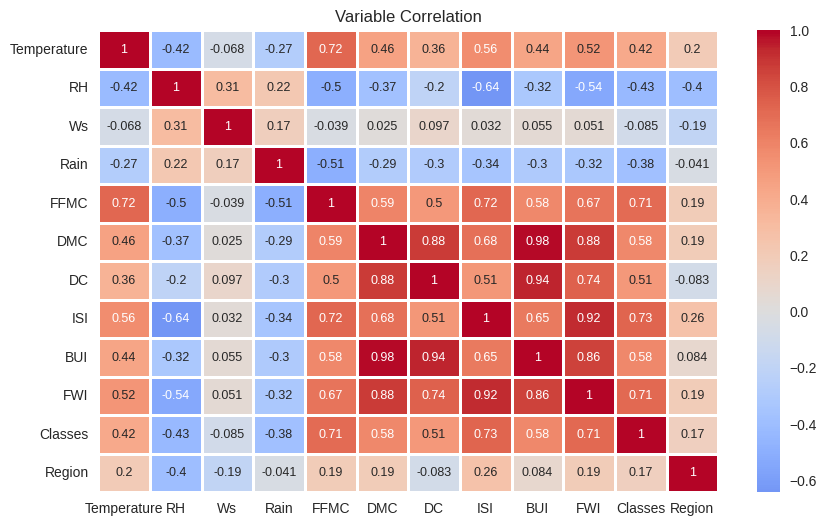

In [ ]:

#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

OBSERVATIONS

Temperature: The correlation values of Temperature with other features are relatively low, indicating that it might not have a strong linear relationship with other features.

RH (Relative Humidity): Similar to Temperature, RH also shows low correlation values with other features.

WS (Wind Speed) and DC (Drought Code): The correlation value is negative but not very strong, suggesting a weak inverse relationship.

Rain and FWI (Fire Weather Index): The correlation value is -0.41, indicating a moderate negative relationship. This suggests that higher rainfall is associated with lower FWI values.

DC (Drought Code) and DMC (Duff Moisture Code): These two features have a very high correlation value of 0.98, indicating a strong positive linear relationship. This suggests that as DC increases, DMC also tends to increase, and vice versa.

ISI (Initial Spread Index) and FFMC (Fine Fuel Moisture Code): These two features show some level of positive correlation, suggesting that they might increase or decrease together.

Classes and Region: These categorical features show low correlation values with other features, indicating that they might not have a strong linear relationship with other features.

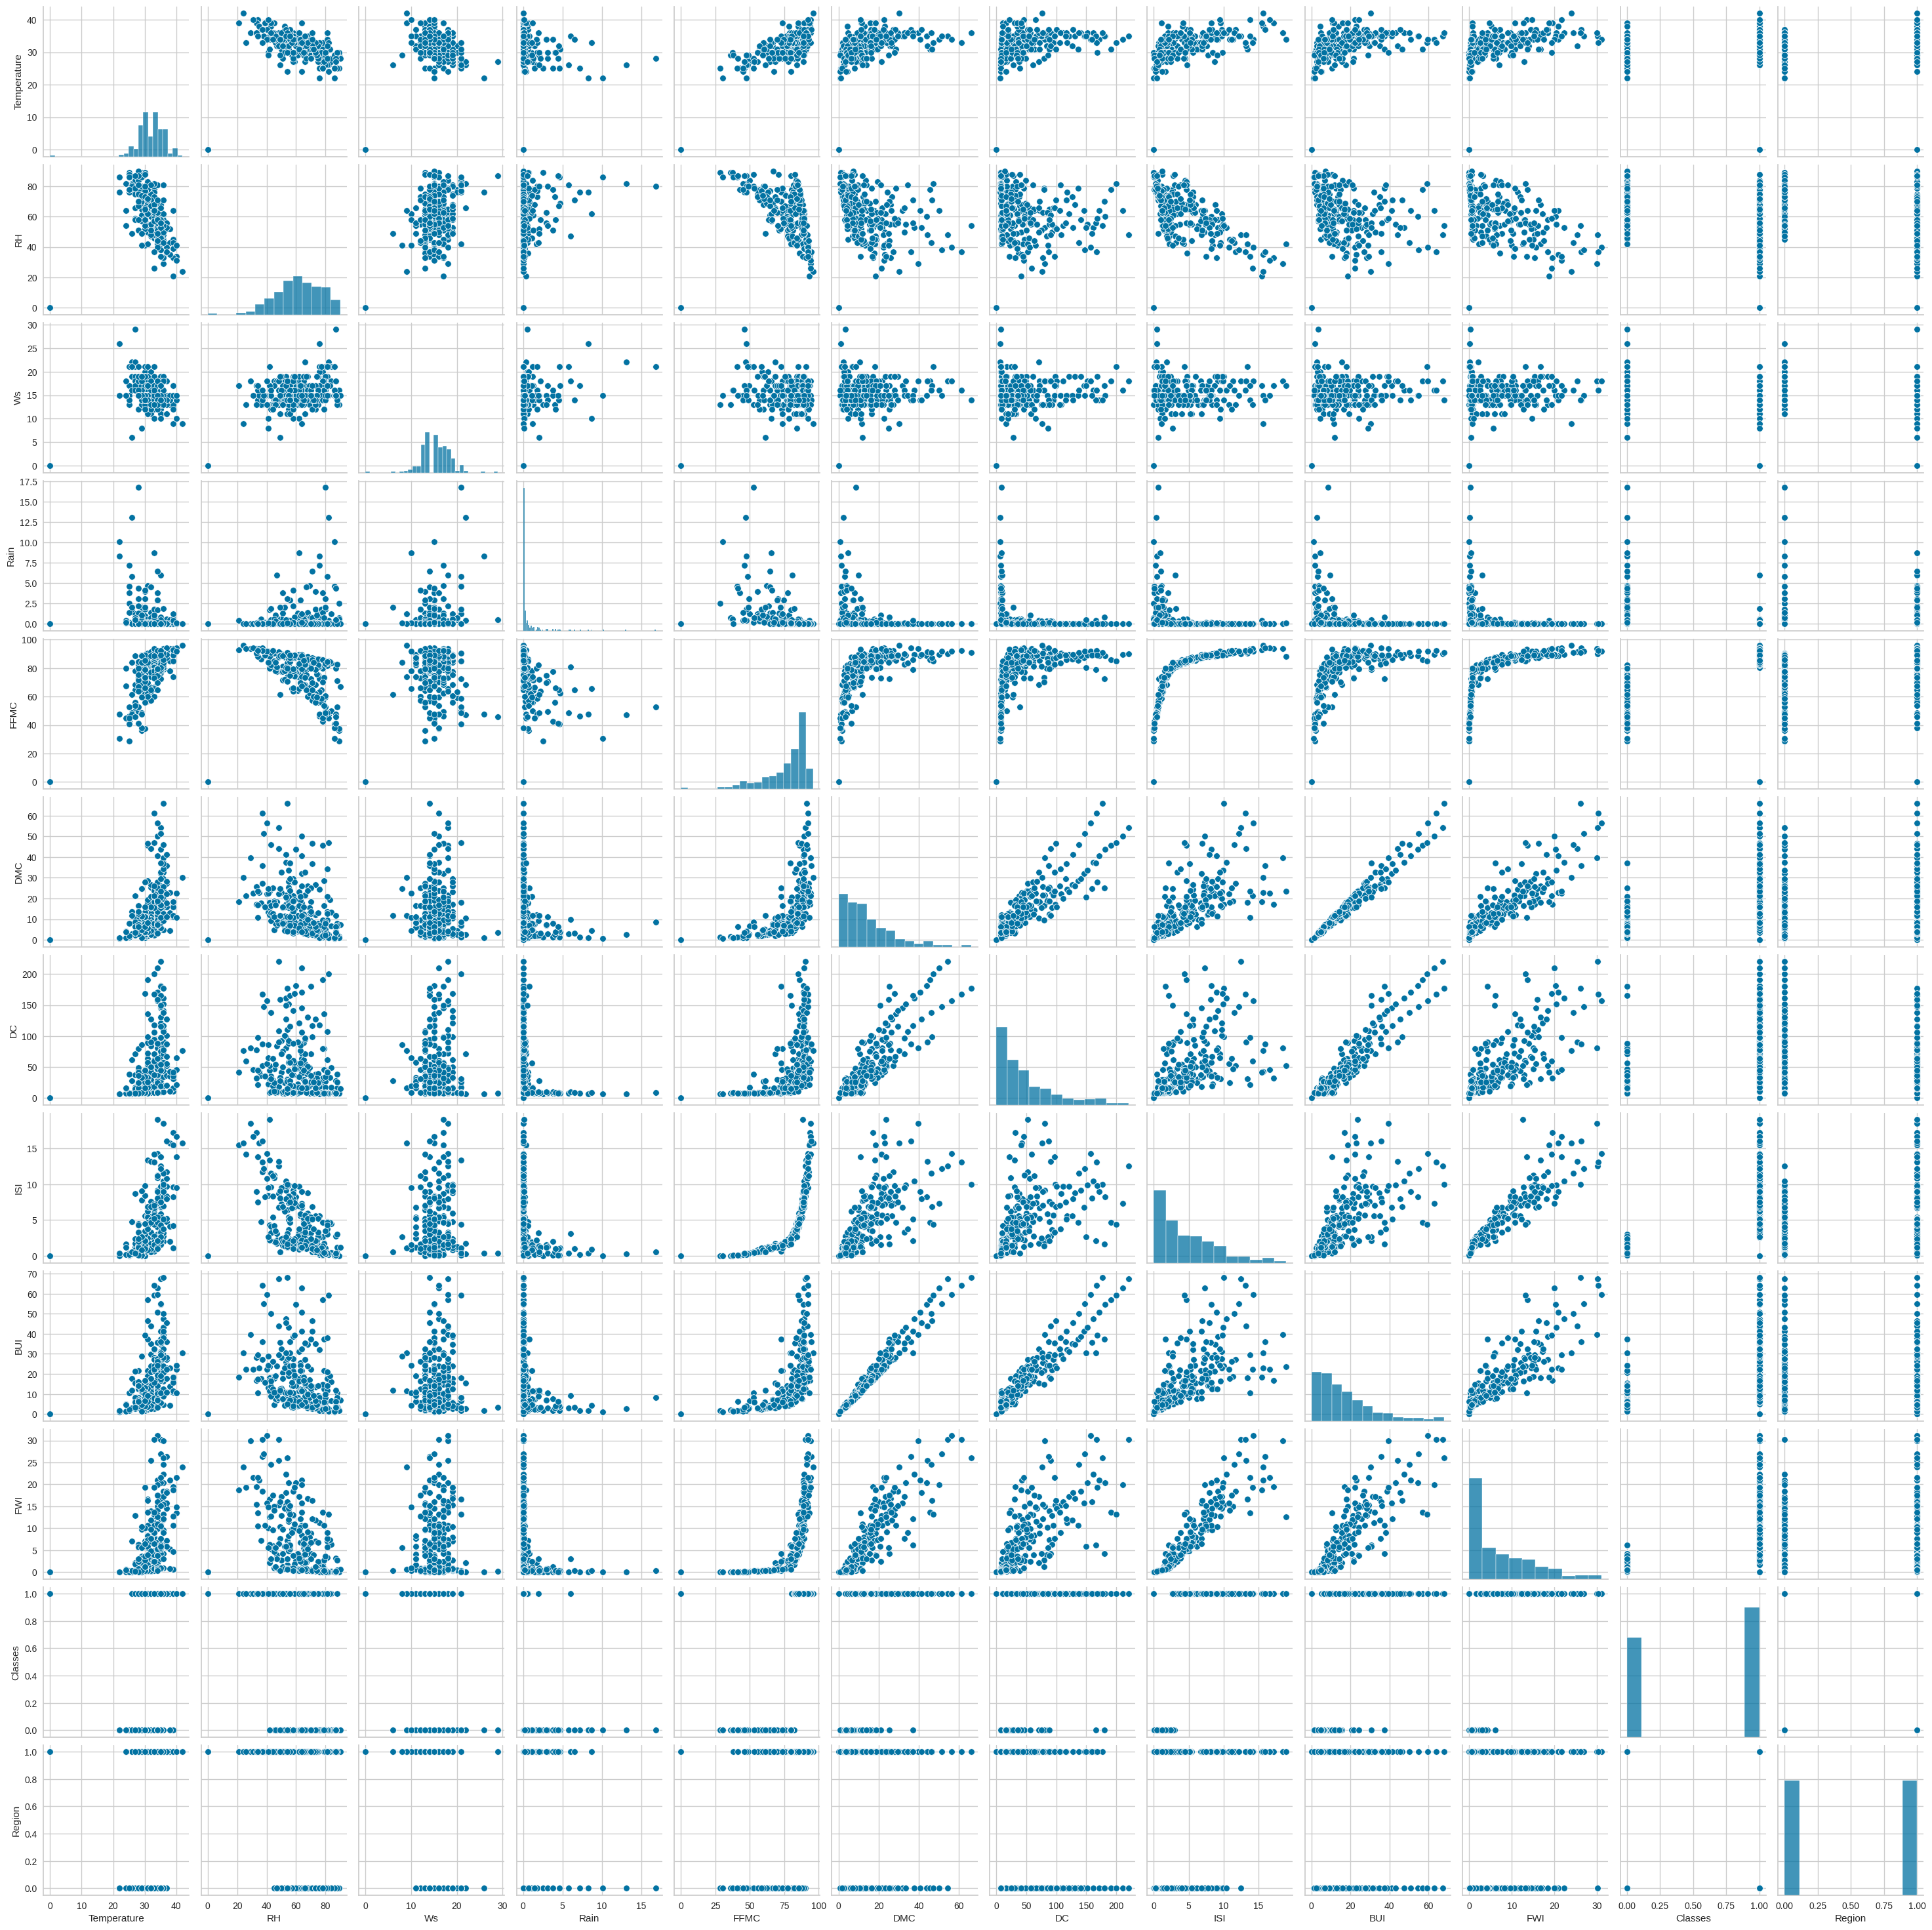

In [ ]:

sns.pairplot(dfpd)

## SHAP ANALYSIS

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
#Display all columns in X
X=df.columns
print(X)


['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


In [ ]:
y_numeric ='FWI'
X.remove(y_numeric)
print(X)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [106]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |
01:01:44.636: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
01:15:53.861: New models will be added to existing leaderboard AutoML_2_20231212_10139@@FWI (leaderboard frame=null) with already 190 models.
01:15:55.508: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
01:15:59.393: StackedEnsemble_BestOfFamily_6_AutoML_3_20231212_11553 [StackedEnsemble best_of_family_2 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
01:15:59.411: StackedEnsemble_AllModels_5_AutoML_3_20231212_11553 [StackedEnsemble all_2 (built with AUTO metalearner, using all AutoML models)] fa

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


**OBSERVATION:**

**Model Configuration**:

The stacking strategy used is cross-validation.
Out of 6 base models, 3 were used. These include 1 GBM (Gradient Boosting Machine), 1 XGBoost (Extreme Gradient Boosting), and 1 Deep Learning model. No DRF (Distributed Random Forest) or GLM (Generalized Linear Model) base models were used.
The metalearner algorithm used is GLM, with a random fold assignment scheme and 5 folds.


**Performance on Training Data:**

The model has a Mean Squared Error (MSE) of 0.085, Root Mean Squared Error (RMSE) of 0.292, and Mean Absolute Error (MAE) of 0.232.
The R-squared value, which represents the proportion of variance in the dependent variable that can be predicted from the independent variable(s), is very high at 0.999, indicating that the model explains almost all of the variability of the response data around its mean.


**Performance on Cross-Validation Data:**

The model has a MSE of 0.600, RMSE of 0.775, and MAE of 0.438 on the cross-validation data.
The R-squared value on the cross-validation data is 0.990, which is slightly lower than on the training data but still very high.
Cross-Validation Metrics Summary:

The mean MAE across the 5 folds of cross-validation is 0.433, with a standard deviation of 0.100.
The mean MSE is 0.586, with a standard deviation of 0.478.
The R-squared values across the 5 folds range from 0.980 to 0.995, with a mean of 0.990.

In [ ]:
best_model = aml.leader

In [ ]:
df_train_pd = df_train.as_data_frame()

In [ ]:
feature_names = df_train_pd.columns.tolist()

In [107]:
# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)


model_id                                                    rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20231212_10139  0.774872  0.600426  0.437746  0.101722                   0.600426
GBM_grid_2_AutoML_3_20231212_11553_model_89             0.832215  0.692582  0.481764  0.0994601                  0.692582
GBM_grid_3_AutoML_4_20231212_12640_model_89             0.832215  0.692582  0.481764  0.0994601                  0.692582
GBM_grid_1_AutoML_2_20231212_10139_model_89             0.832215  0.692582  0.481764  0.0994601                  0.692582
XGBoost_grid_2_AutoML_3_20231212_11553_model_25         0.88      0.7744    0.538408  0.113601                   0.7744
XGBoost_grid_1_AutoML_2_20231212_10139_model_25         0.88      0.7744    0.538408  0.113601                   0.7744
XGBoost_grid_3_AutoML_4_20231212_12640_model_25         0.88      0.7744    0.538408  0.113601                   0.7744
XGBoost_grid_3_AutoML_4_202312

**Leader Model: StackedEnsemble_BestOfFamily_4_AutoML_2_20231212_10139**

RMSE (Root Mean Squared Error): 0.774872
MSE (Mean Squared Error): 0.600426
MAE (Mean Absolute Error): 0.437746
RMSLE (Root Mean Squared Logarithmic Error): 0.101722
Mean Residual Deviance: 0.600426
The Stacked Ensemble is the best-performing model on the leaderboard. It is a meta-model that combines predictions from various base models in an ensemble fashion. The RMSE value of 0.774872 indicates the average deviation of predicted values from actual values, and lower values are better. The same interpretation holds for MSE, MAE, and RMSLE.

Other Models:

GBM Models (Gradient Boosting Machine):

GBM_grid_2_AutoML_3_20231212_11553_model_89
GBM_grid_3_AutoML_4_20231212_12640_model_89
GBM_grid_1_AutoML_2_20231212_10139_model_89
These three GBM models have similar performance metrics. GBM is a popular boosting algorithm, and different hyperparameter configurations were likely explored during AutoML. The RMSE, MSE, MAE, and other metrics are comparable among these GBM models.

XGBoost Models:

XGBoost_grid_2_AutoML_3_20231212_11553_model_25
XGBoost_grid_1_AutoML_2_20231212_10139_model_25
XGBoost_grid_3_AutoML_4_20231212_12640_model_25
XGBoost_grid_3_AutoML_4_20231212_12640_model_42
XGBoost_grid_1_AutoML_2_20231212_10139_model_42
XGBoost_grid_2_AutoML_3_20231212_11553_model_42
These XGBoost models also show similar performance. XGBoost is another boosting algorithm known for its effectiveness. Different hyperparameter configurations were explored for XGBoost during AutoML.

# FEATURE IMPORTANCE

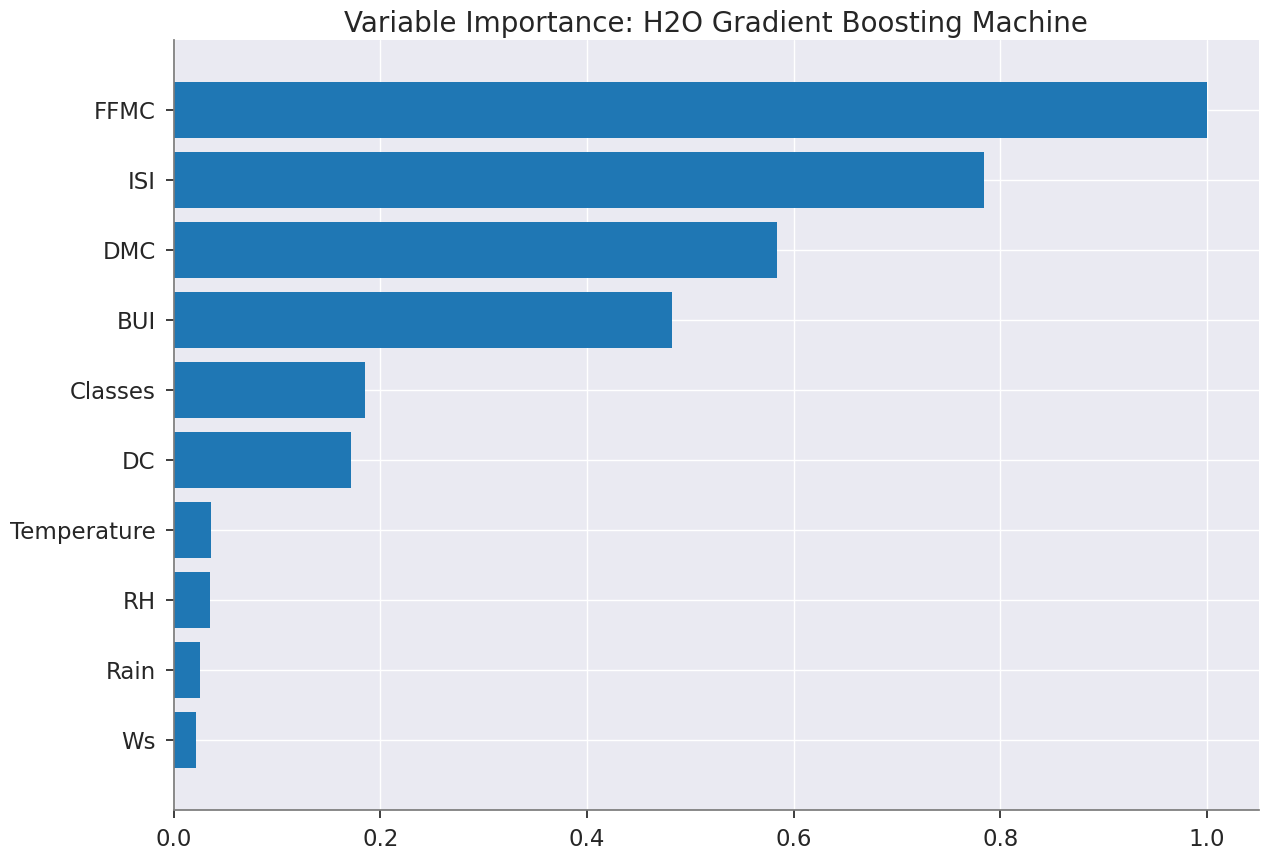

<Figure size 800x550 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import h2o

# Assuming 'aml' is your AutoML object
leader_model = aml.leader

# Plot variable importance
leader_model.varimp_plot()

# Display the plot
plt.show()

OBSERVATION

FFMC: This is the most important variable, explaining 100% of the variance.

ISI: The second most important variable, accounting for 80% of the variance.

DMC: This variable explains 60% of the variance, making it the third most important.

BUI: This variable is fourth in importance, explaining 40% of the variance.

Classes: This variable is fifth in importance, explaining 20% of the variance.

DC: This variable is sixth in importance, explaining 10% of the variance.
Temperature: This variable is seventh in importance, explaining 5% of the variance.

RH: This variable is eighth in importance, explaining 2.5% of the variance.



Temperature: Temperature is likely to be an important variable for predicting the target variable because it affects the rate of evaporation and transpiration.

Relative humidity: Relative humidity is another important variable because it affects the amount of water vapor in the air.

Rain: Rain is likely to be an important variable because it affects the availability of water for plants and the amount of moisture in the soil.

Wind speed: Wind speed is likely to be an important variable because it affects the rate of evaporation and transpiration.

# LICENCE

REFERENCES

W3schools https://docs.h2o.ai/ https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f
A Complete Guide to Dealing with Missing values in Python

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression

Copyright (c) 2023 Chetan Warad

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.